# A static visualization of the Covid cases

## The relative cases overtime of Covid infectors (absolut Covid cases/population size)
* two figures uploaded in OLAT and the link to your personal GITHUB repository with the source code

A static visualization of the Covid cases always 3 countries of your choice are in each figure 
The relative cases overtime of Covid infectors (absolut Covid cases/population size)
The vaccination rate (percentage of the population) over time

In [385]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline

pd.set_option('display.max_rows', 500)

* John Hopkins (GITHUB) https://github.com/CSSEGISandData/COVID-19.git

## GITHUB csv data

In [386]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [387]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/30/22,5/31/22,6/1/22,6/2/22,6/3/22,6/4/22,6/5/22,6/6/22,6/7/22,6/8/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180259,180347,180419,180520,180584,180615,180615,180688,180741,180784
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276101,276101,276221,276221,276310,276342,276401,276415,276468,276518
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265877,265884,265887,265889,265889,265889,265897,265900,265904,265909
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42894,42894,42894,42894,43067,43067,43067,43067,43067,43224
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [388]:
time_idx=pd_raw.columns[4:]

In [389]:
df_plot=pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [390]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [391]:
pd_raw[pd_raw['Country/Region']=='US'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    1
1/23/20    1
1/24/20    2
1/25/20    2
dtype: int64

In [392]:
country_list=['Germany',
             'Serbia',
             'Sweden'
             ]

In [393]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

<AxesSubplot:xlabel='date'>

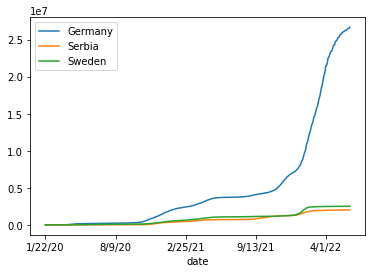

In [394]:
%matplotlib inline
df_plot.set_index('date').plot()

In [395]:
df_plot.head()

,date,Germany,Serbia,Sweden
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,0,0
3,1/25/20,0,0,0
4,1/26/20,0,0,0


In [396]:
owid_data_path='../data/raw/owid-covid-data.csv'
pd_raw_owid=pd.read_csv(owid_data_path)

In [397]:
pd_raw_owid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192783,ZWE,Africa,Zimbabwe,2022-06-05,253338.0,102.0,178.000,5510.0,1.0,1.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
192784,ZWE,Africa,Zimbabwe,2022-06-06,253508.0,170.0,202.286,5513.0,3.0,1.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
192785,ZWE,Africa,Zimbabwe,2022-06-07,253637.0,129.0,177.000,5515.0,2.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
192786,ZWE,Africa,Zimbabwe,2022-06-08,253779.0,142.0,129.286,5515.0,0.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [398]:
len(pd_raw_owid['location'].unique())

244

In [399]:
india = pd_raw_owid[pd_raw_owid['location']=='India']
swd = pd_raw_owid[pd_raw_owid['location']=='Sweden']
ger = pd_raw_owid[pd_raw_owid['location']=='Germany']


In [400]:
ger

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
65093,DEU,Europe,Germany,2020-01-27,1.0,1.0,NaN,NaN,NaN,NaN,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
65094,DEU,Europe,Germany,2020-01-28,4.0,3.0,NaN,NaN,NaN,NaN,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
65095,DEU,Europe,Germany,2020-01-29,4.0,0.0,NaN,NaN,NaN,NaN,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
65096,DEU,Europe,Germany,2020-01-30,4.0,0.0,NaN,NaN,NaN,NaN,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
65097,DEU,Europe,Germany,2020-01-31,5.0,1.0,NaN,NaN,NaN,NaN,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65953,DEU,Europe,Germany,2022-06-05,26496611.0,3376.0,36072.000,139386.0,0.0,74.571,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
65954,DEU,Europe,Germany,2022-06-06,26498361.0,1750.0,27480.714,139388.0,2.0,55.429,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
65955,DEU,Europe,Germany,2022-06-07,26583016.0,84655.0,31723.286,139533.0,145.0,63.143,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN
65956,DEU,Europe,Germany,2022-06-08,26660652.0,77636.0,35885.286,139623.0,90.0,57.286,...,28.2,33.1,NaN,8.0,81.33,0.947,NaN,NaN,NaN,NaN


In [401]:
## India
india_x=india['date']
india_cases=india['total_cases']
india_pop=india['population']
india_res=india_cases.diff()/india_pop

##Sweden
swd_x=swd['date']
swd_cases=swd['total_cases']
swd_pop=swd['population']
swd_res=swd_cases.diff()/swd_pop

## Germany
ger_x=ger['date']
ger_cases=ger['total_cases']
ger_pop=ger['population']
ger_res=ger_cases.diff()/ger_pop


In [402]:
ger_res

65093             NaN
65094    3.575665e-08
65095    0.000000e+00
65096    0.000000e+00
65097    1.191888e-08
             ...     
65953    4.023815e-05
65954    2.085805e-05
65955    1.008993e-03
65956    9.253345e-04
65957    9.282189e-04
Length: 865, dtype: float64

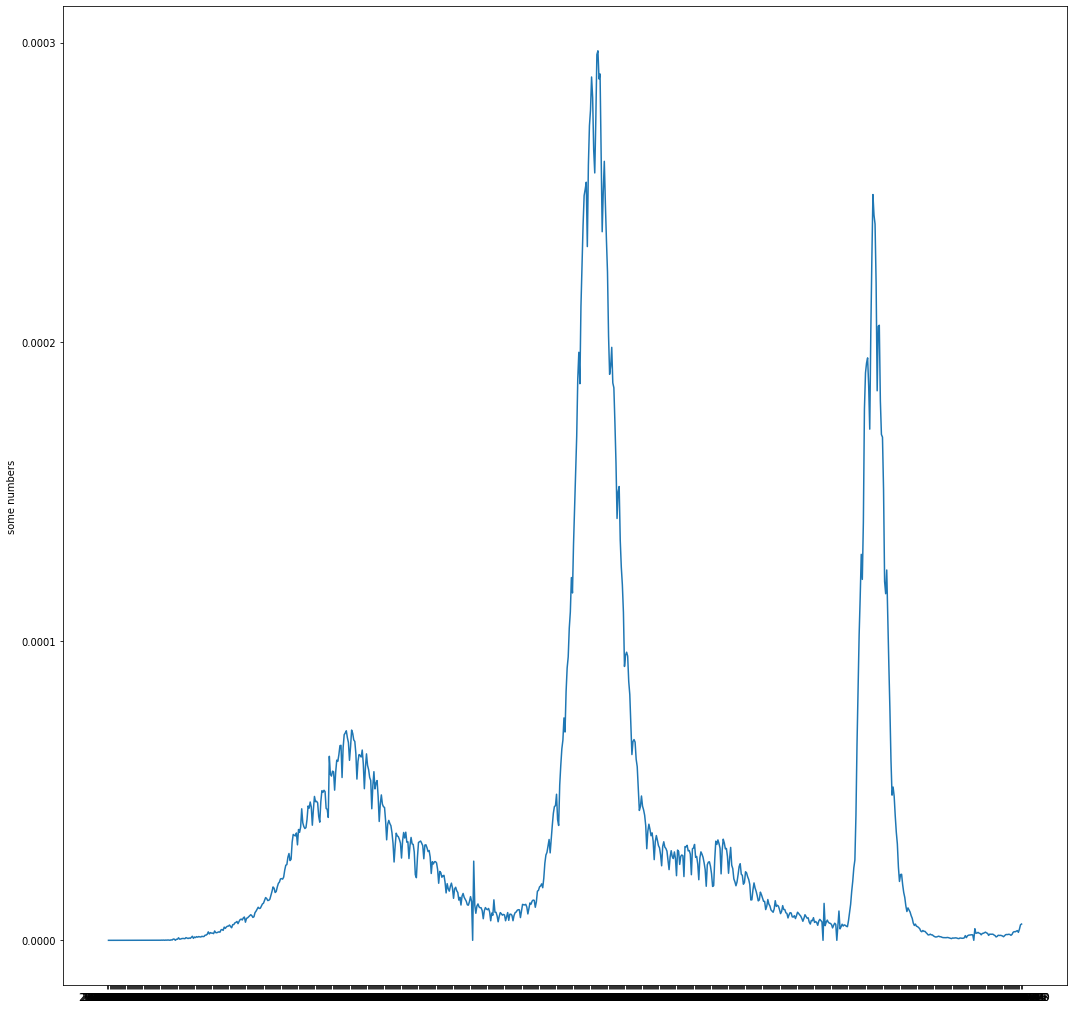

In [403]:
import matplotlib.pyplot as plt


plt.figure(figsize=(18, 18))


plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=2)

plt.plot(india_x,india_res)
plt.ylabel('some numbers')
plt.show()

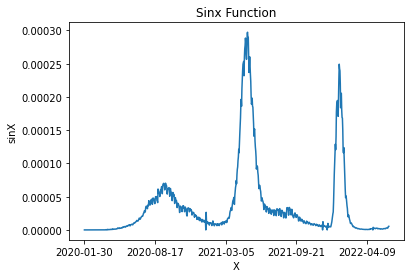

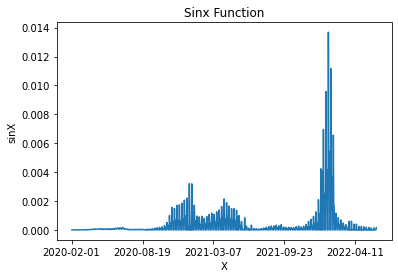

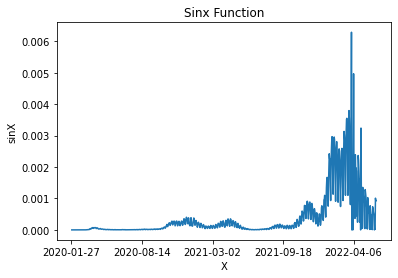

In [404]:
from matplotlib.ticker import MaxNLocator

x=india_x
y=india_res

fig,axes=plt.subplots(1,1)

axes.plot(x, y)
axes.xaxis.set_major_locator(MaxNLocator(5)) 
axes.set_title("Sinx Function")
axes.set_xlabel("X")
axes.set_ylabel("sinX")
plt.show()

x=swd_x
y=swd_res

fig,axes=plt.subplots(1,1)

axes.plot(x, y)
axes.xaxis.set_major_locator(MaxNLocator(5)) 
axes.set_title("Sinx Function")
axes.set_xlabel("X")
axes.set_ylabel("sinX")
plt.show()


x=ger_x
y=ger_res

fig,axes=plt.subplots(1,1)

axes.plot(x, y)
axes.xaxis.set_major_locator(MaxNLocator(5)) 
axes.set_title("Sinx Function")
axes.set_xlabel("X")
axes.set_ylabel("sinX")
plt.show()


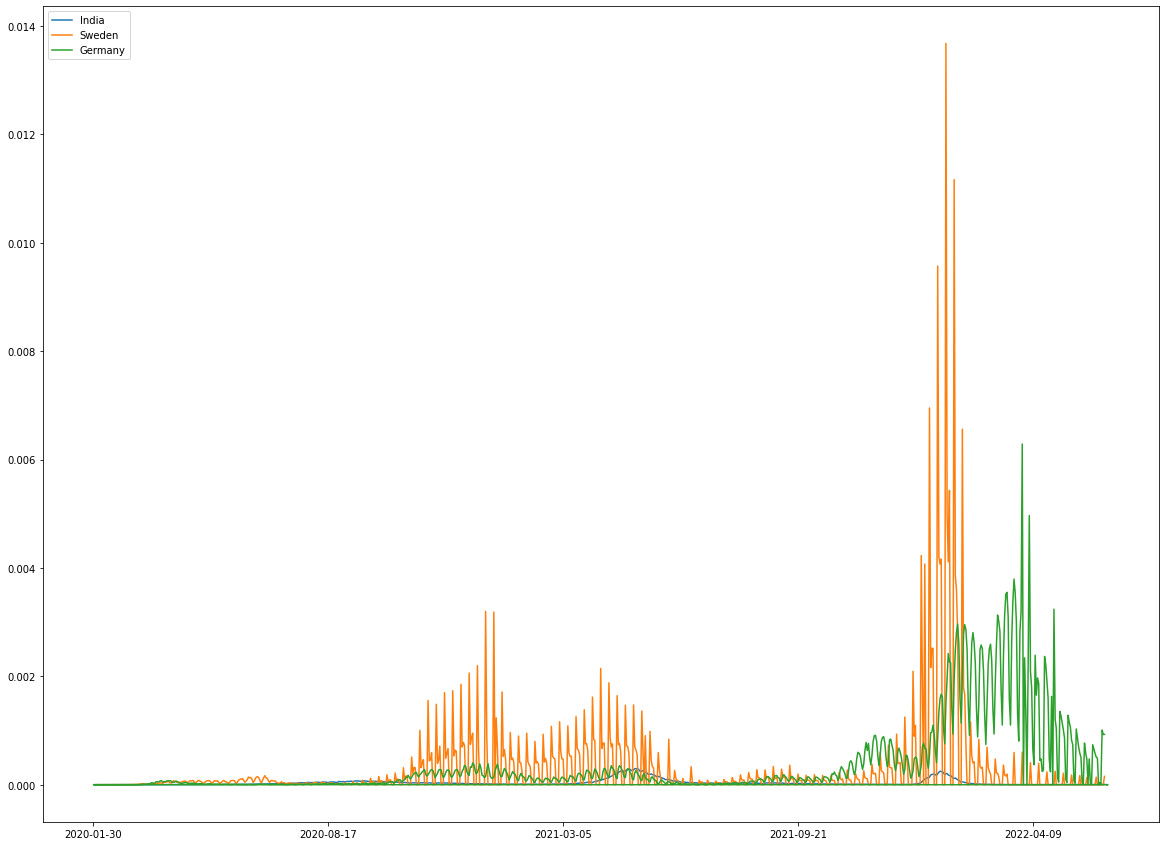

In [405]:
x = range(100)
y = range(100,200)
fig = plt.figure(figsize=(20, 15))


ax1 = fig.add_subplot(111)
ax1.set_yscale= ('log')

ax1.xaxis.set_major_locator(MaxNLocator(5)) 
ax1.plot(india_x,india_res, label='India')
ax1.plot(swd_x, swd_res, label='Sweden')
ax1.plot(ger_x, ger_res, label='Germany')
plt.legend(loc='upper left');
plt.show()



In [406]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [407]:
import plotly
plotly.__version__

'5.8.2'

In [414]:
fig = go.Figure()

## defines how to plot the individual trace

fig = make_subplots()
fig.add_trace(go.Scatter(x=india_x,
                                y=india_res,
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=10, 
                                name='India')
                     )
fig.add_trace(go.Scatter(x=swd_x,
                                y=swd_res,
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=10, 
                                name='Sweden')
                     )
fig.add_trace(go.Scatter(x=ger_x,
                                y=ger_res,
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=2,
                                marker_size=10, 
                                name='Germany')
                     )

## defines the overall layout properties
fig.update_layout(
    width=1000,
    height=900,
    xaxis_title="Time",
    yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
)



fig.update_layout(xaxis_rangeslider_visible=True)
#fig.show(renderer='chrome')
fig.show()